In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import RandomizedSearchCV
from sklearn.grid_search import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt


In [9]:
INPUT_DATA = [
    "body_acc_x_",
    "body_acc_y_",
    "body_acc_z_",
    "body_gyro_x_",
    "body_gyro_y_",
    "body_gyro_z_",
    "total_acc_x_",
    "total_acc_y_",
    "total_acc_z_"
]

LABELS = [
    "WALKING", 
    "WALKING_UPSTAIRS", 
    "WALKING_DOWNSTAIRS", 
    "SITTING", 
    "STANDING", 
    "LAYING"
] 

TRAINING_SIZE = 1000
TESTING_SIZE = 300

'''
COLUMNS = ['gx','gy','gz', 'tax', 'tay', 'taz']

X_train = pd.DataFrame(COLUMNS)
for i in range(0,6):
    X_train[i] = pd.read_csv('data/train/'+INPUT_DATA[3+i]+'train.txt', sep=" ", header=None)
    X_test[i] = pd.read_csv('data/test/'+INPUT_DATA[3+i]+'test.txt', sep=" ", header=None)



#X_train = pd.read_csv('data/X_train.txt', sep=" ", header=None)
Y_train = pd.read_csv('data/Y_train.txt', sep=" ", header=None)

#X_test = pd.read_csv('data/X_test.txt', sep=" ", header=None)
Y_test = pd.read_csv('data/Y_test.txt', sep=" ", header=None)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

X_train.head()
Y_train.head()

X = X_train[0:1000]
Y = Y_train[0:1000]
Xt = X_test[0:300]
Yt = Y_test[0:300]

print(X.shape)
print(Y.shape)
print(Xt.shape)
print(Yt.shape)
'''

'\nCOLUMNS = [\'gx\',\'gy\',\'gz\', \'tax\', \'tay\', \'taz\']\n\nX_train = pd.DataFrame(COLUMNS)\nfor i in range(0,6):\n    X_train[i] = pd.read_csv(\'data/train/\'+INPUT_DATA[3+i]+\'train.txt\', sep=" ", header=None)\n    X_test[i] = pd.read_csv(\'data/test/\'+INPUT_DATA[3+i]+\'test.txt\', sep=" ", header=None)\n\n\n\n#X_train = pd.read_csv(\'data/X_train.txt\', sep=" ", header=None)\nY_train = pd.read_csv(\'data/Y_train.txt\', sep=" ", header=None)\n\n#X_test = pd.read_csv(\'data/X_test.txt\', sep=" ", header=None)\nY_test = pd.read_csv(\'data/Y_test.txt\', sep=" ", header=None)\n\nprint(X_train.shape)\nprint(Y_train.shape)\nprint(X_test.shape)\nprint(Y_test.shape)\n\nX_train.head()\nY_train.head()\n\nX = X_train[0:1000]\nY = Y_train[0:1000]\nXt = X_test[0:300]\nYt = Y_test[0:300]\n\nprint(X.shape)\nprint(Y.shape)\nprint(Xt.shape)\nprint(Yt.shape)\n'

In [10]:

def load_X(X_signals_paths):
    X_signals = []
    
    for signal_type_path in X_signals_paths:
        file = open(signal_type_path, 'r')
        # Read dataset from disk, dealing with text files' syntax
        X_signals.append(
            [np.array(serie, dtype=np.float32) for serie in 
             [row.replace('  ', ' ').strip().split(' ') for row in file]
            ]
        )
        file.close()
    
    return np.transpose(np.array(X_signals), (1, 2, 0))


def load_y(y_path):
    file = open(y_path, 'r')
    # Read dataset from disk, dealing with text file's syntax
    y_ = np.array(
        [elem for elem in [
            row.replace('  ', ' ').strip().split(' ') for row in file
        ]], 
        dtype=np.int32
    )
    file.close()
    return y_


X_train_input_paths = ["data/train/" + signal + "train.txt" for signal in INPUT_DATA]
X_test_input_paths = ["data/test/" + signal + "test.txt" for signal in INPUT_DATA]
X_train = load_X(X_train_input_paths)
X_test = load_X(X_test_input_paths)

y_train_path = "data/y_train.txt"
y_test_path = "data/y_test.txt"
Y_train = load_y(y_train_path).ravel()
Y_test = load_y(y_test_path).ravel()

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

print(X_train[0])
print(Y_train[0])

X = X_train[0:TRAINING_SIZE]
Y = Y_train[0:TRAINING_SIZE]
Xt = X_test[0:TESTING_SIZE]
Yt = Y_test[0:TESTING_SIZE]

print(X.shape)
print(Y.shape)
print(Xt.shape)
print(Yt.shape)

np.savetxt("data/test_data_format.csv", X[0], delimiter=",")


(7352, 128, 9)
(7352,)
(2947, 128, 9)
(2947,)
[[  1.80851493e-04   1.07668098e-02   5.55606782e-02 ...,   1.01281703e+00
   -1.23216704e-01   1.02934100e-01]
 [  1.01385601e-02   6.57948013e-03   5.51248305e-02 ...,   1.02283299e+00
   -1.26875594e-01   1.05687201e-01]
 [  9.27557424e-03   8.92887823e-03   4.84047309e-02 ...,   1.02202797e+00
   -1.24003701e-01   1.02102503e-01]
 ..., 
 [ -1.14748406e-03   1.71443899e-04   2.64786393e-03 ...,   1.01844501e+00
   -1.24069601e-01   1.00385197e-01]
 [ -2.22265502e-04   1.57418102e-03   2.38105701e-03 ...,   1.01937199e+00
   -1.22745097e-01   9.98735502e-02]
 [  1.57550001e-03   3.07018892e-03  -2.26975698e-03 ...,   1.02117097e+00
   -1.21325999e-01   9.49874073e-02]]
5
(1000, 128, 9)
(1000,)
(300, 128, 9)
(300,)


In [11]:
plt.figure(figsize=(11,7))
colors = ['#D62728','#2C9F2C','#FD7F23','#1F77B4','#9467BD',
          '#8C564A','#7F7F7F','#1FBECF','#E377C2','#BCBD27']

for i, r in enumerate([0,27,65,100,145,172]):
    plt.subplot(3,2,i+1)
    plt.plot(X[r][:100], label=LABELS[Y[r]-1], color=colors[i], linewidth=2)
    plt.xlabel('Samples @50Hz')
    plt.legend(loc='upper left')
    plt.tight_layout()

In [17]:
#KNN


# define the parameter values that should be searched
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_dist = dict(n_neighbors=k_range, weights=weight_options)
grid = GridSearchCV(knn(), param_dist, cv=4, scoring='accuracy')
grid.fit(X.reshape(X.shape[0], X.shape[1]*X.shape[2]), Y)

#print(grid.grid_scores_)
#grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
#print(grid_mean_scores)
print(grid.best_score_)
print(grid.best_params_)

# plot the results
#plt.plot(k_range, grid_mean_scores)
#plt.xlabel('Value of K for KNN')
#plt.ylabel('Cross-Validated Accuracy')


rand = RandomizedSearchCV(knn(), param_dist, cv=4, scoring='accuracy', n_iter=10, random_state=5)
rand.fit(X.reshape(X.shape[0], X.shape[1]*X.shape[2]), Y)

#print(rand.grid_scores_)
#rand_mean_scores = [result.mean_validation_score for result in rand.grid_scores_]
#print(rand_mean_scores)
print(rand.best_score_)
print(rand.best_params_)

#plt.plot(k_range, rand_mean_scores)
#plt.xlabel('Value of K for KNN')
#plt.ylabel('Cross-Validated Accuracy')


0.731
{'n_neighbors': 2, 'weights': 'uniform'}
0.547
{'weights': 'distance', 'n_neighbors': 10}


In [18]:
Y_pred = grid.predict(Xt.reshape(Xt.shape[0], Xt.shape[1]*Xt.shape[2]))
print("Accuracy Rate:")
print(metrics.accuracy_score(Yt, Y_pred))
print(metrics.confusion_matrix(Yt, Y_pred))

Y_pred1 = rand.predict(Xt.reshape(Xt.shape[0], Xt.shape[1]*Xt.shape[2]))
print("Accuracy Rate:")
print(metrics.accuracy_score(Yt, Y_pred1))
print(metrics.confusion_matrix(Yt, Y_pred1))



Accuracy Rate:
0.55
[[ 8  0  0  0 51  0]
 [ 2 31  0  0 13  0]
 [ 4  7  6  1 29  0]
 [ 0  0  0 18 28  0]
 [ 0  0  0  0 54  0]
 [ 0  0  0  0  0 48]]
Accuracy Rate:
0.413333333333
[[ 0  0  0  0 59  0]
 [ 0  8  0  0 38  0]
 [ 0  1  1  0 45  0]
 [ 0  0  0 13 33  0]
 [ 0  0  0  0 54  0]
 [ 0  0  0  0  0 48]]


Precision: 75.49413533834586%
Recall: 55.00000000000001%
f1_score: 52.156523073626104%

Confusion Matrix:
[[ 8  0  0  0 51  0]
 [ 2 31  0  0 13  0]
 [ 4  7  6  1 29  0]
 [ 0  0  0 18 28  0]
 [ 0  0  0  0 54  0]
 [ 0  0  0  0  0 48]]

Confusion matrix (normalised to % of total test data):
[[  2.66666675   0.           0.           0.          17.           0.        ]
 [  0.66666669  10.33333302   0.           0.           4.33333349   0.        ]
 [  1.33333337   2.33333325   2.           0.33333334   9.66666603   0.        ]
 [  0.           0.           0.           6.           9.33333302   0.        ]
 [  0.           0.           0.           0.          18.           0.        ]
 [  0.           0.           0.           0.           0.          16.        ]]
Note: training and testing data is not equally distributed amongst classes, 
so it is normal that more than a 6th of the data is correctly classifier in the last category.


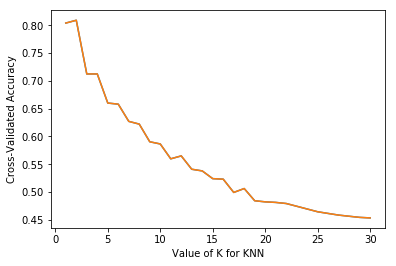

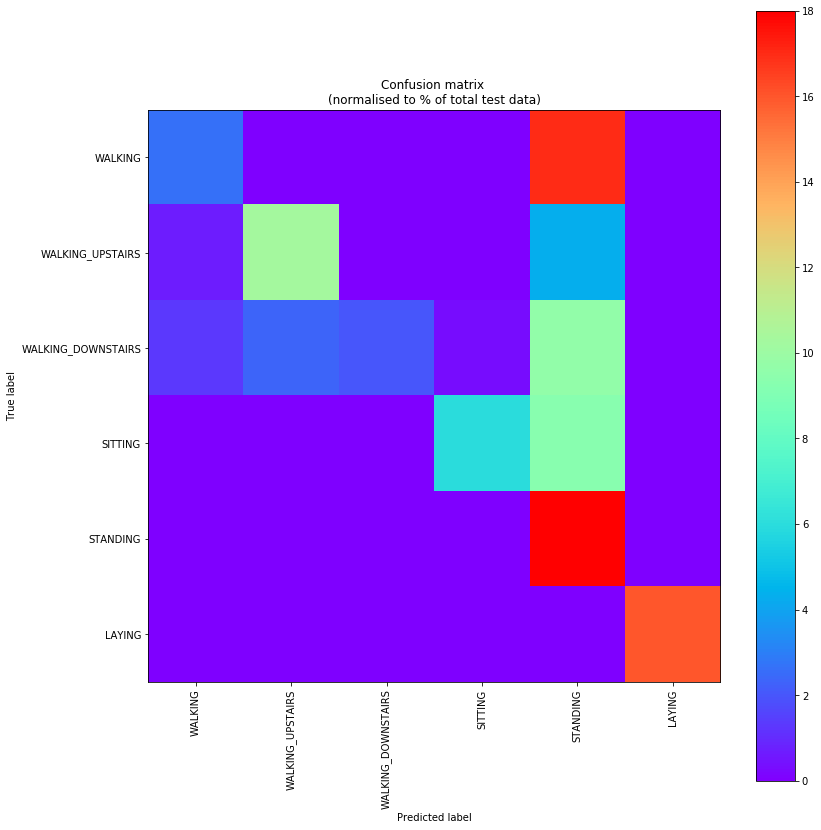

In [19]:

print("Precision: {}%".format(100*metrics.precision_score(Yt, Y_pred, average="weighted")))
print("Recall: {}%".format(100*metrics.recall_score(Yt, Y_pred, average="weighted")))
print("f1_score: {}%".format(100*metrics.f1_score(Yt, Y_pred, average="weighted")))

print("")
print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(Yt, Y_pred)
print(confusion_matrix)
normalised_confusion_matrix = np.array(confusion_matrix, dtype=np.float32)/np.sum(confusion_matrix)*100

print("")
print("Confusion matrix (normalised to % of total test data):")
print(normalised_confusion_matrix)
print("Note: training and testing data is not equally distributed amongst classes, ")
print("so it is normal that more than a 6th of the data is correctly classifier in the last category.")

# Plot Results: 
width = 12
height = 12
plt.figure(figsize=(width, height))
plt.imshow(
    normalised_confusion_matrix, 
    interpolation='nearest', 
    cmap=plt.cm.rainbow
)
plt.title("Confusion matrix \n(normalised to % of total test data)")
plt.colorbar()
tick_marks = np.arange(len(LABELS))
plt.xticks(tick_marks, LABELS, rotation=90)
plt.yticks(tick_marks, LABELS)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()